What are the key factors contributing to employee attrition within our organization, and how can understanding these factors lead to effective strategies to improve employee retention, engagement, and overall satisfaction? 

Our primary goal is to unravel the underlying factors driving employee attrition within our organization. By identifying these conditions, we aim to forge strategic interventions that mitigate turnover, bolstering employee engagement and satisfaction.

# EDA

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

attrition_df = pd.read_csv('HR Attrition.csv')
pd.set_option('display.max_columns', None)
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,Yes,Rarely,1180,Research & Development,29,1,Medical,2,Male,70,3,2,Healthcare Representative,1,Married,6673.0,11354.0,7,Yes,19,1,2,0,17,2,1,1,0,0,0
1,49,No,Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130.0,24907.0,1,No,23,4,4,1,10,3,3,10,7,1,7
2,28,Yes,No,1366,Research & Development,24,2,Technical Degree,2,Male,72,2,3,Healthcare Representative,1,Single,8722.0,12355.0,1,No,12,1,1,0,10,2,1,10,7,1,0
3,33,No,Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909.0,23159.0,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468.0,16632.0,9,No,12,3,4,1,6,3,3,2,2,2,2


The dataset was cleaned in a previous assignment

In [186]:
attrition_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4743.0,38.142526,11.484992,18.0,29.0,37.0,47.0,60.0
DailyRate,4743.0,790.404807,406.402176,102.0,441.0,773.0,1145.0,1499.0
DistanceFromHome,4743.0,19.462155,14.543199,1.0,7.0,17.0,30.0,50.0
Education,4743.0,11.120388,6.530728,1.0,3.0,14.0,16.0,20.0
EnvironmentSatisfaction,4743.0,2.557031,1.109022,1.0,2.0,3.0,4.0,4.0
HourlyRate,4743.0,81.190597,32.611221,30.0,54.0,78.0,103.0,150.0
JobInvolvement,4743.0,2.581278,0.996029,1.0,2.0,3.0,3.0,4.0
JobLevel,4743.0,2.646005,1.399874,1.0,1.0,2.0,4.0,5.0
JobSatisfaction,4743.0,2.532996,1.128462,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,4743.0,9680.481130,5276.229455,1009.0,5075.0,8960.0,14053.0,28800.0


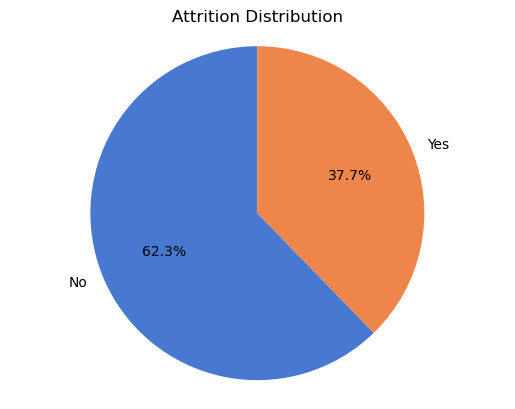

In [187]:
# 37.7% employees have left the company
# Possible Imbalance Issue
sns.set_palette("muted")  
colors = sns.color_palette()
pie_data = attrition_df['Attrition'].value_counts()

fig, ax = plt.subplots()
ax.pie(pie_data, labels=pie_data.index, 
       autopct='%1.1f%%', 
       startangle=90, colors=[colors[0], colors[1]])
ax.axis('equal')  

plt.title('Attrition Distribution')
plt.show()

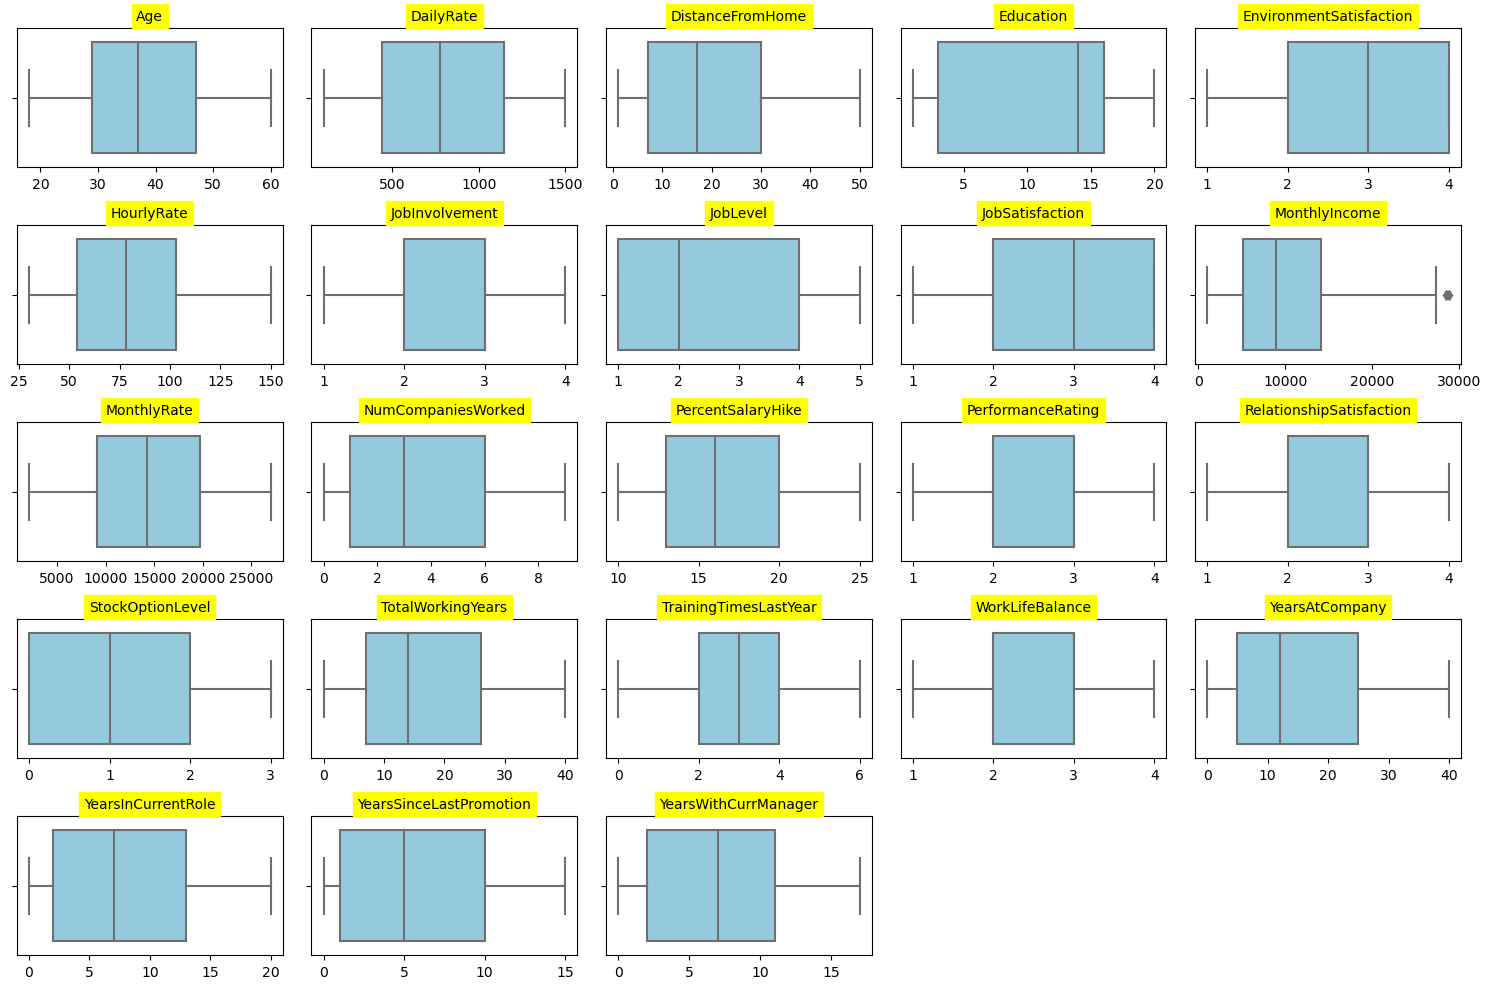

In [188]:
# Univariate analisys for numeric features
def univariate_numeric_plotter(data):
    numeric_cols = data.select_dtypes("number").columns
    
    num_plots = len(numeric_cols)
    num_rows = (num_plots + 4) // 5  
    
    fig, axs = plt.subplots(nrows=num_rows, ncols=5, figsize=(15, 2 * num_rows))  
    axs = axs.flatten()  
    
    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=col, data=data, ax=axs[i], color='skyblue')  
        axs[i].set_title(col, backgroundcolor='yellow', color='black', fontsize=10)
        axs[i].set_xlabel('')
    
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

univariate_numeric_plotter(attrition_df)

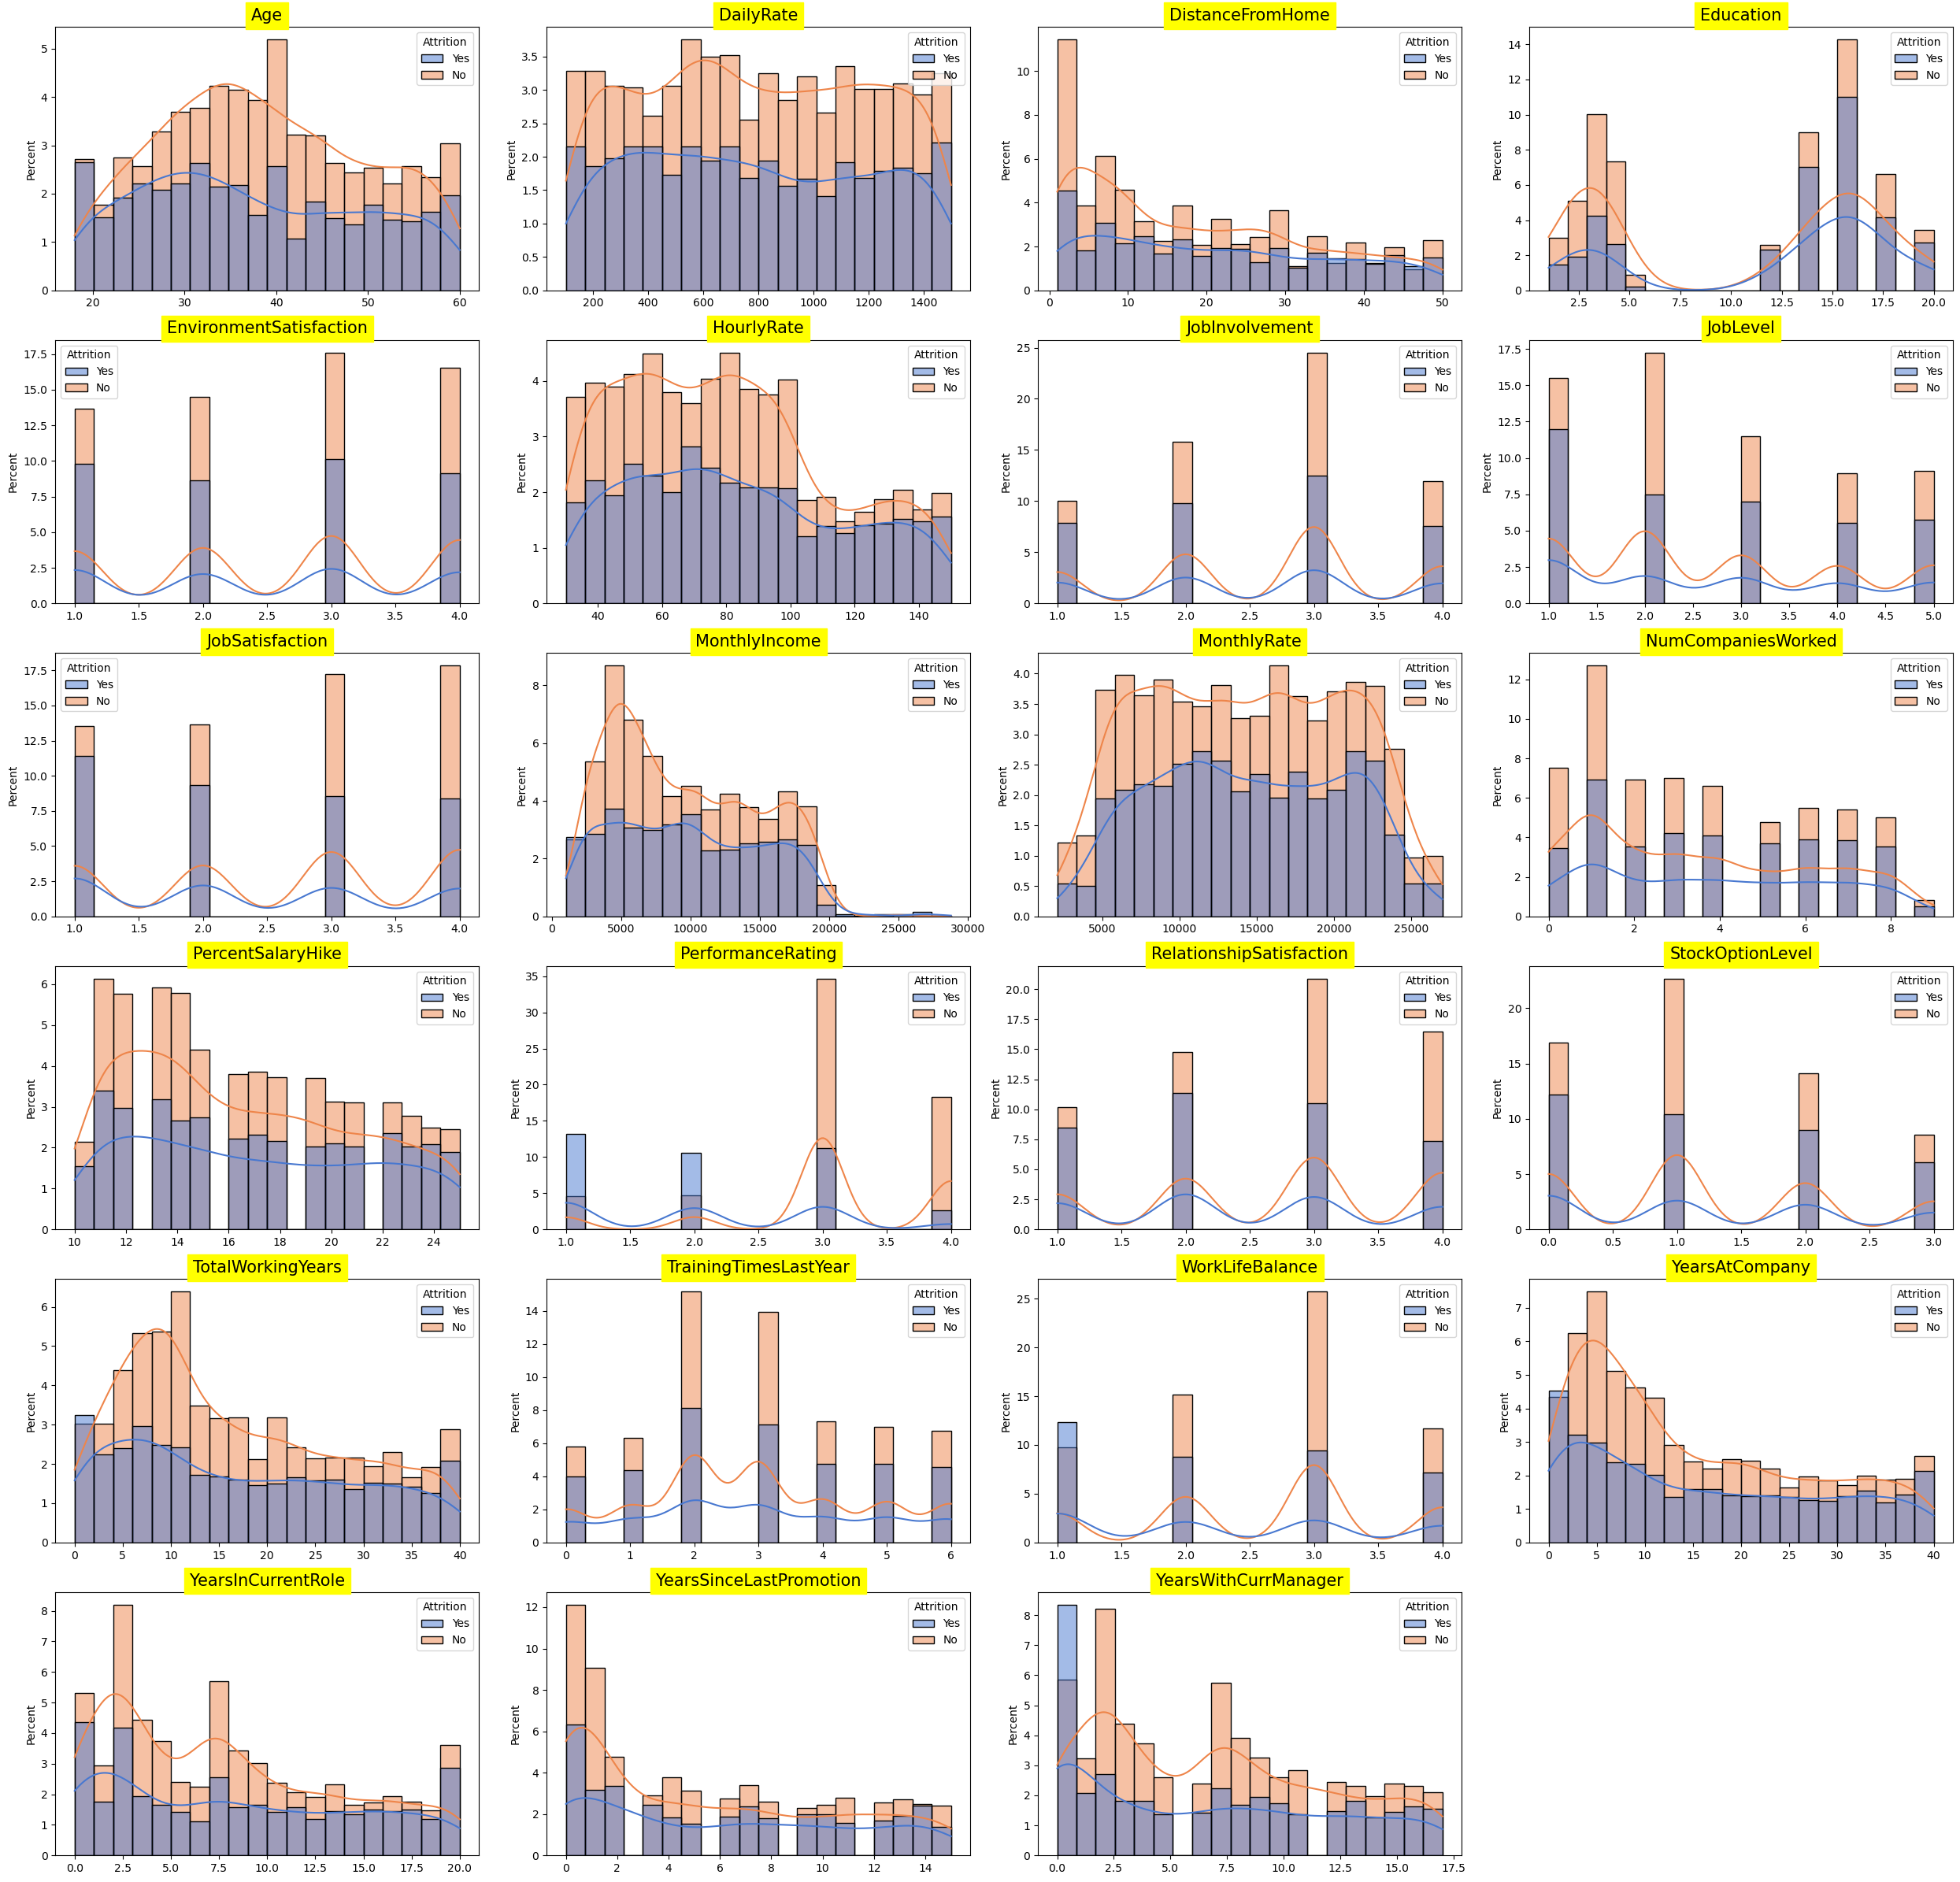

In [189]:
def hist_target_plotter(data, target):
    numeric_cols = data.select_dtypes("number").columns
    
    num_plots = len(numeric_cols)
    num_rows = (num_plots + 3) // 4  
    
    fig, axs = plt.subplots(nrows=num_rows, ncols=4, figsize=(25, 4 * num_rows))
    axs = axs.flatten()  
    
    for i, col in enumerate(numeric_cols):
        sns.histplot(data=data, x=col, hue=target, stat="percent", kde=True, bins=20, ax=axs[i])
        axs[i].set_title(col, backgroundcolor='yellow', color='black', fontsize=15)
        axs[i].set_xlabel('')
    
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

hist_target_plotter(attrition_df, "Attrition")

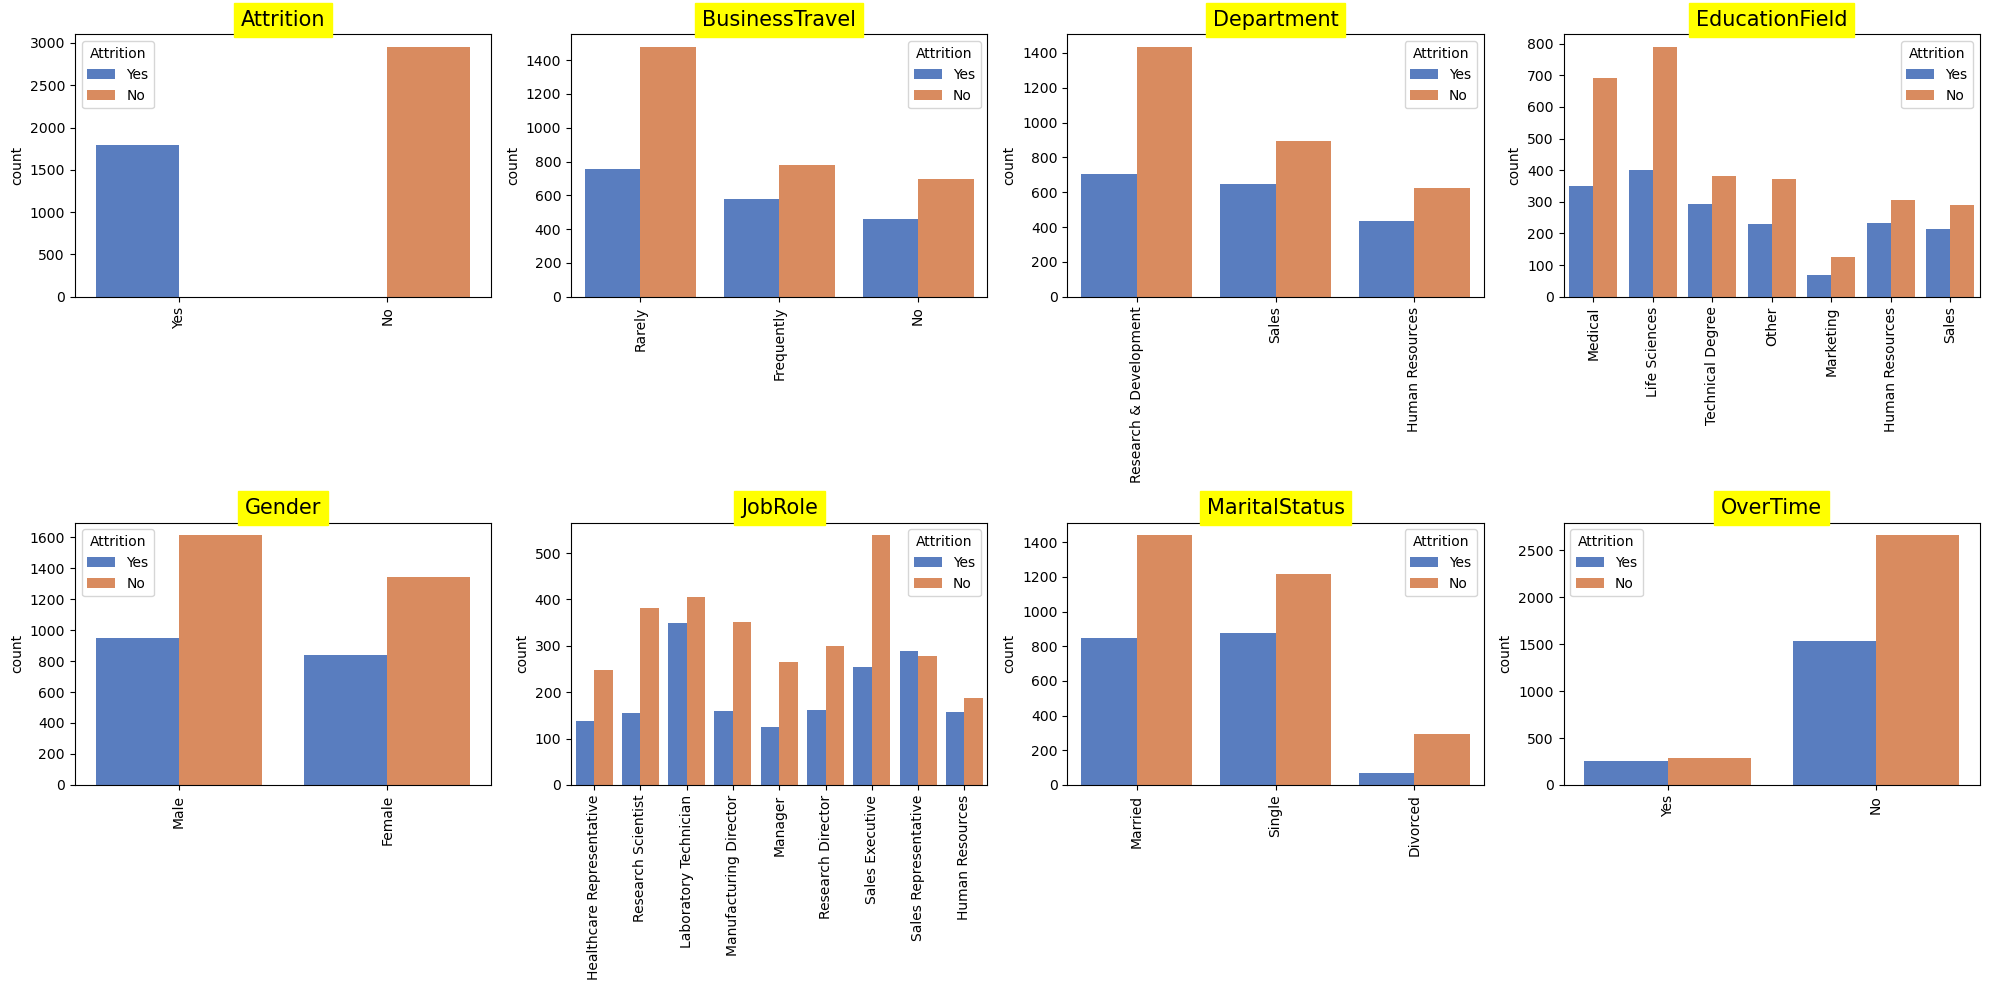

In [190]:
# Bar plots for all categorical features
def cat1_plotter(data, target):
    categorical_cols = data.select_dtypes(["object", "category"]).columns
    
    num_plots = len(categorical_cols)
    num_rows = (num_plots + 3) // 4  
    
    fig, axs = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  
    axs = axs.flatten()  
    
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=data,x=col, hue=target, ax=axs[i])
        axs[i].tick_params(axis='x', rotation=90)
        axs[i].set_title(col, backgroundcolor='yellow', color='black', fontsize=15)
        axs[i].set_xlabel('')
    
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

cat1_plotter(attrition_df, 'Attrition')

### Findings:
-The attrition data reflects a slight variance between genders, with a rate of aproximately 38% for females and 37% for males, indicating nearly equivalent retention levels across the board.

-Trends indicate that the Sales department experiences the most attrition, followed by Human Resources, while Research & Development maintains a higher retention rate.

-Our younger demographic, particularly those under 47, shows a higher propensity to transition between jobs, which stabilizes as employees mature.

-Employees within a tenure window of 5 to 12 years demonstrate greater organizational loyalty. Notably, those exceeding 25 years of tenure exhibit a resurgence in attrition.

-Interestingly, increased salary does not linearly correlate with retention, as higher income brackets also show elevated attrition rates.

-There's a marked trend where individuals with a history of frequent job changes, especially those with five or more past roles, are more inclined to leave.

-The period since the last promotion has a palpable impact on attrition, with certain intervals showing heightened departure rates. 

-Commute distance has a varied impact on attrition, with longer commutes correlating with increased attrition, particularly noticeable for commutes exceeding 25 miles.

-The absence of stock options is linked with higher attrition. Thus, tangible benefits can bolster employee retention despite longer commute challenges.

In [191]:
attrition_df['Attrition'] = attrition_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

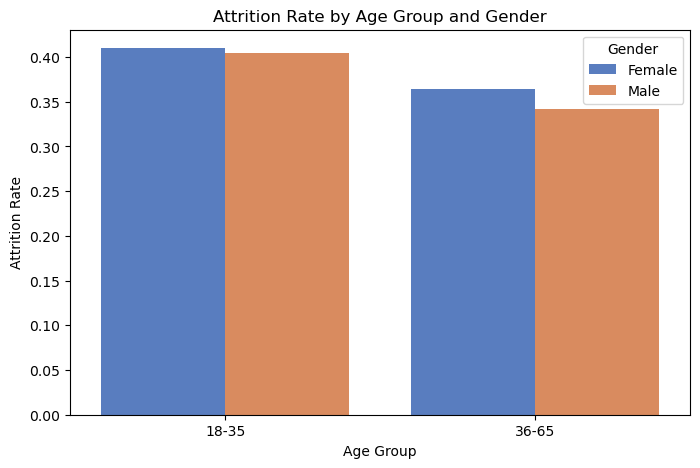

In [192]:
# Create age group for analysis
attrition_df['Age_Group'] = pd.cut(attrition_df['Age'], bins=[17, 35, 65], labels=['18-35', '36-65'])

# Group by age group and gender to see attrition rates
age_gender_attrition = attrition_df.groupby(['Age_Group', 'Gender'])['Attrition'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=age_gender_attrition, x='Age_Group', y='Attrition', hue='Gender')
plt.title('Attrition Rate by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Attrition Rate')
plt.show()

The bar plot demonstrates that for both men and women, the attrition rate is higher in the 18-35 age group compared to the 36-65 age group. This indicates that younger employees are more likely to leave the organization than their older counterparts

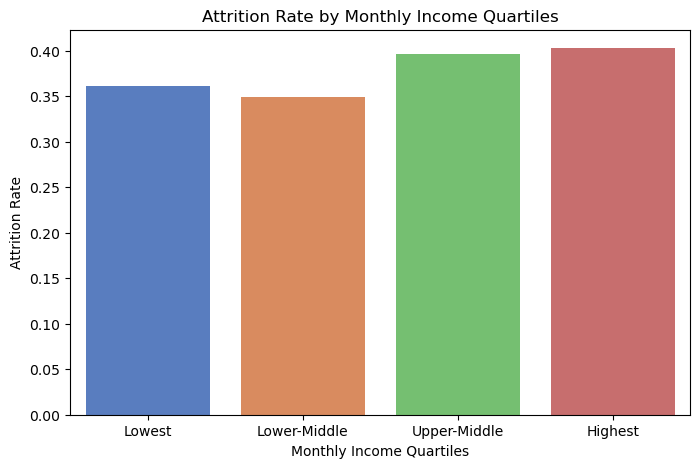

In [193]:
# Visualize attrition rate by monthly income
# We will categorize income into quartiles for a clearer view
attrition_df['Income_Quartile'] = pd.qcut(attrition_df['MonthlyIncome'], 4, labels=['Lowest', 'Lower-Middle', 'Upper-Middle', 'Highest'])

income_attrition = attrition_df.groupby('Income_Quartile')['Attrition'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=income_attrition, x='Income_Quartile', y='Attrition', order=['Lowest', 'Lower-Middle', 'Upper-Middle', 'Highest'])
plt.title('Attrition Rate by Monthly Income Quartiles')
plt.xlabel('Monthly Income Quartiles')
plt.ylabel('Attrition Rate')
plt.show()

In terms of income, the attrition rate decreases as income increases. The data shows a clear trend: employees in the highest income quartile have the lowest attrition rate, while those in the lowest income quartile have the highest.

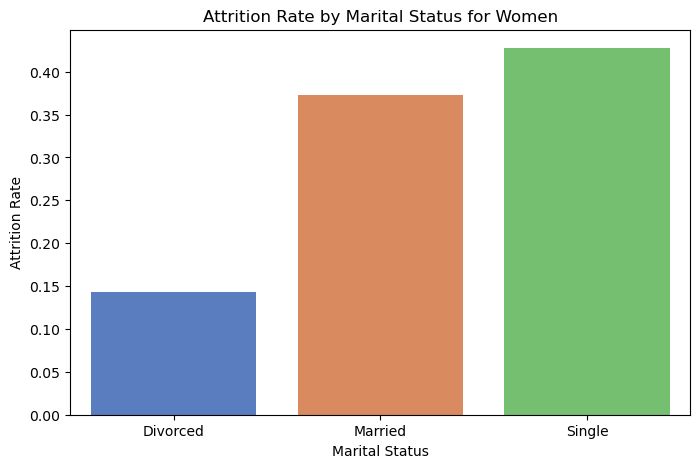

In [194]:
women_data = attrition_df[attrition_df['Gender'] == 'Female']

marital_status_attrition_women = women_data.groupby('MaritalStatus')['Attrition'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=marital_status_attrition_women, x='MaritalStatus', y='Attrition')
plt.title('Attrition Rate by Marital Status for Women')
plt.xlabel('Marital Status')
plt.ylabel('Attrition Rate')
plt.show()

Among women, those who are divorced show a lower attrition rate compared to those who are single or married. This suggests that marital status, specifically being divorced, is associated with a lower likelihood of leaving the job among women.

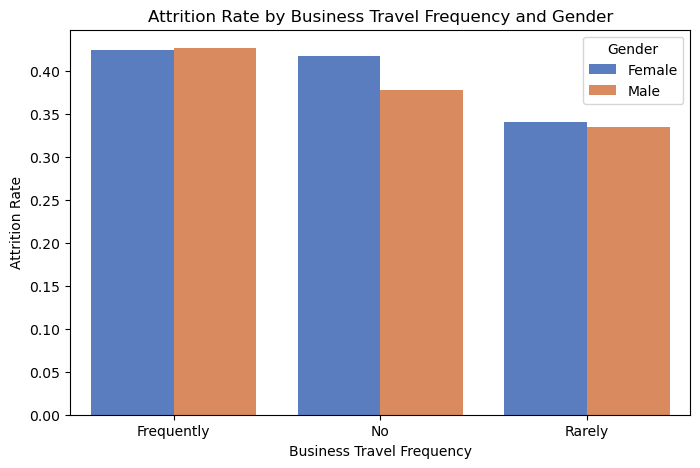

In [195]:
# Group by business travel and gender to see attrition rates
travel_gender_attrition = attrition_df.groupby(['BusinessTravel', 'Gender'])['Attrition'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=travel_gender_attrition, x='BusinessTravel', y='Attrition', hue='Gender')
plt.title('Attrition Rate by Business Travel Frequency and Gender')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Attrition Rate')
plt.show()


Attrition rates vary significantly based on the frequency of business travel. Employees who travel frequently exhibit higher attrition rates than those who travel rarely or not at all. Within the frequently traveling group, women have a higher attrition rate than men.

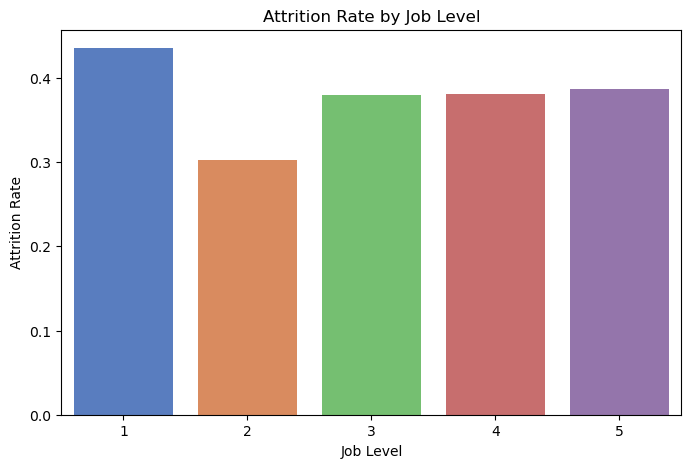

In [196]:
job_level_attrition = attrition_df.groupby('JobLevel')['Attrition'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=job_level_attrition, x='JobLevel', y='Attrition')
plt.title('Attrition Rate by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Attrition Rate')
plt.show()

Attrition rate is particularly high among employees in level 1 jobs, indicating that those in entry-level positions are more likely to leave the organization than those in higher-level positions.

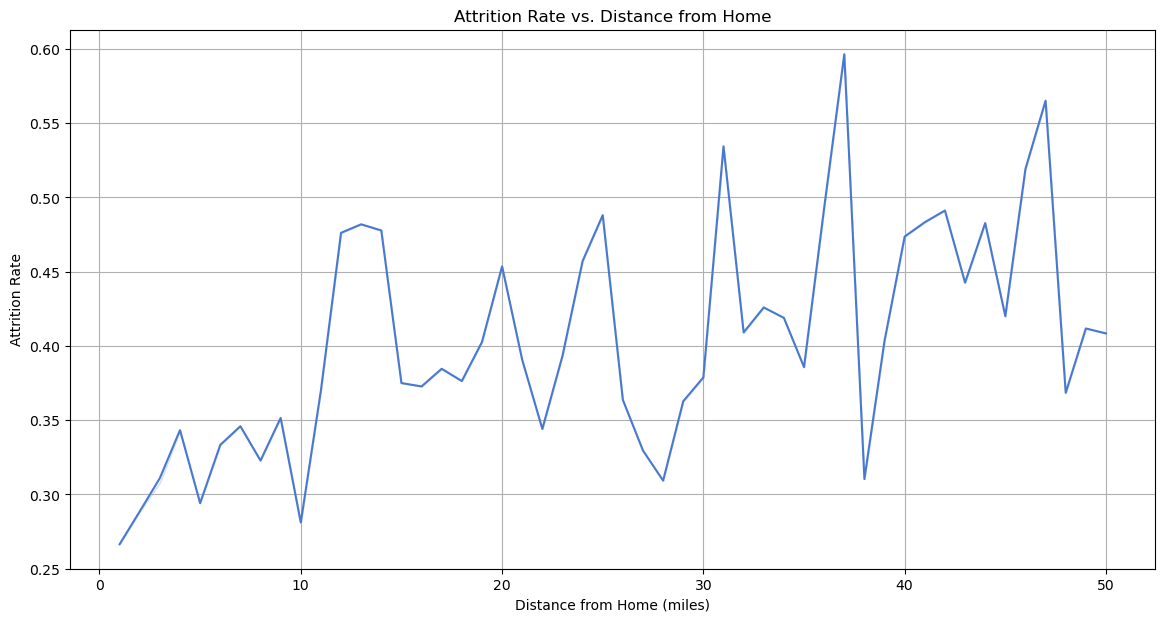

In [197]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=attrition_df, x='DistanceFromHome', y='Attrition', ci=0)
plt.title('Attrition Rate vs. Distance from Home')
plt.xlabel('Distance from Home (miles)')
plt.ylabel('Attrition Rate')
plt.grid(True)
plt.show()


In this line plot, we're looking at how the distance an employee lives from the office affects their likelihood of leaving the company. As we move from left to right, representing an increase in commute distance, there's a clear upward trend in attrition rates. This trend suggests that longer commutes may be linked to employees deciding to leave their jobs, especially when the travel distance is considerable

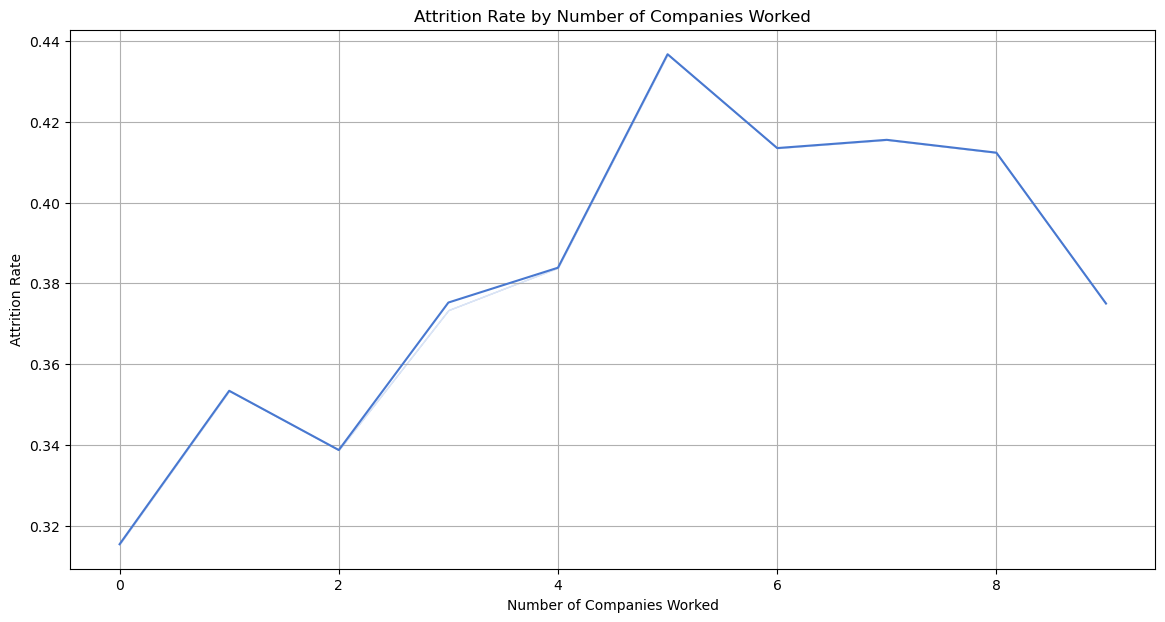

In [198]:
# Sorting the data by the number of companies worked for a clearer trend line
companies_worked_sorted = attrition_df.sort_values(by='NumCompaniesWorked')

plt.figure(figsize=(14, 7))
sns.lineplot(data=companies_worked_sorted, x='NumCompaniesWorked', y='Attrition', ci=0)
plt.title('Attrition Rate by Number of Companies Worked')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Attrition Rate')
plt.grid(True)
plt.show()

The line plot reveals that employees with a history of frequent job changes are more likely to leave their current positions. This trend suggests that such individuals might be habitual job-hoppers, influenced by factors like dissatisfaction or the pursuit of better opportunities. 

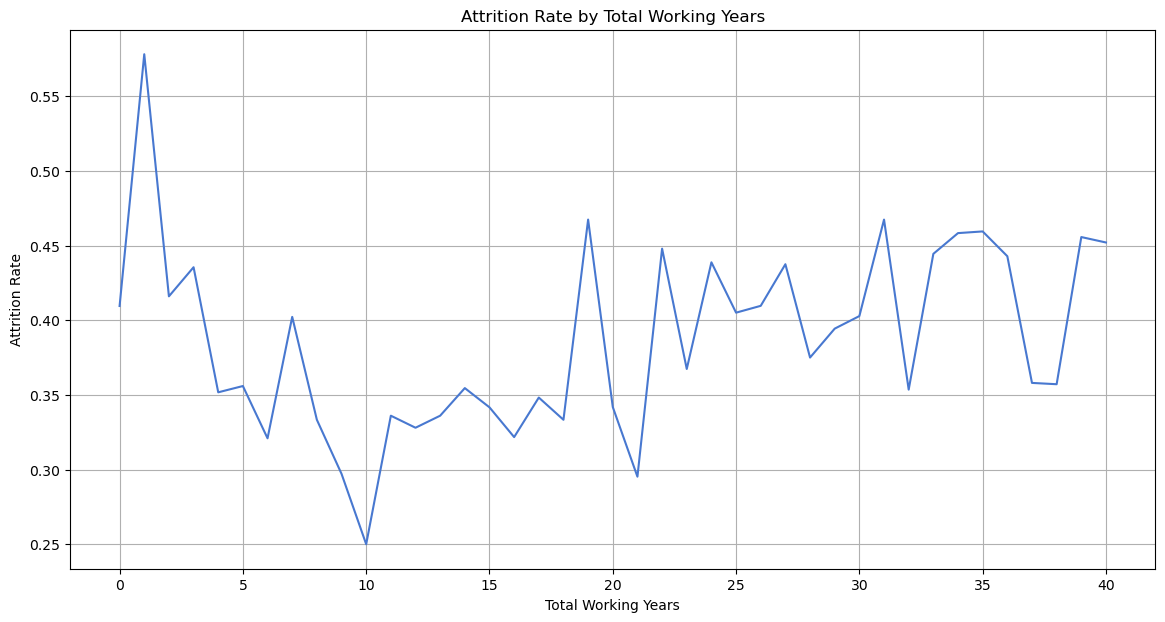

In [199]:
# Group data by total working years and calculate attrition rate
total_working_years_attrition = attrition_df.groupby('TotalWorkingYears')['Attrition'].mean().reset_index().sort_values(by='TotalWorkingYears')

# Create the line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=total_working_years_attrition, x='TotalWorkingYears', y='Attrition')
plt.title('Attrition Rate by Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Attrition Rate')
plt.grid(True)
plt.show()


This line plot shows how the attrition rate varies with the total number of working years an employee has accumulated over their career. The plot indicates that attrition tends to be higher among employees with fewer years of total work experience and gradually decreases as this experience increases. This suggests that more seasoned employees, with broader career experiences, are generally more likely to stay with the company, highlighting the importance of experience in employee retention.

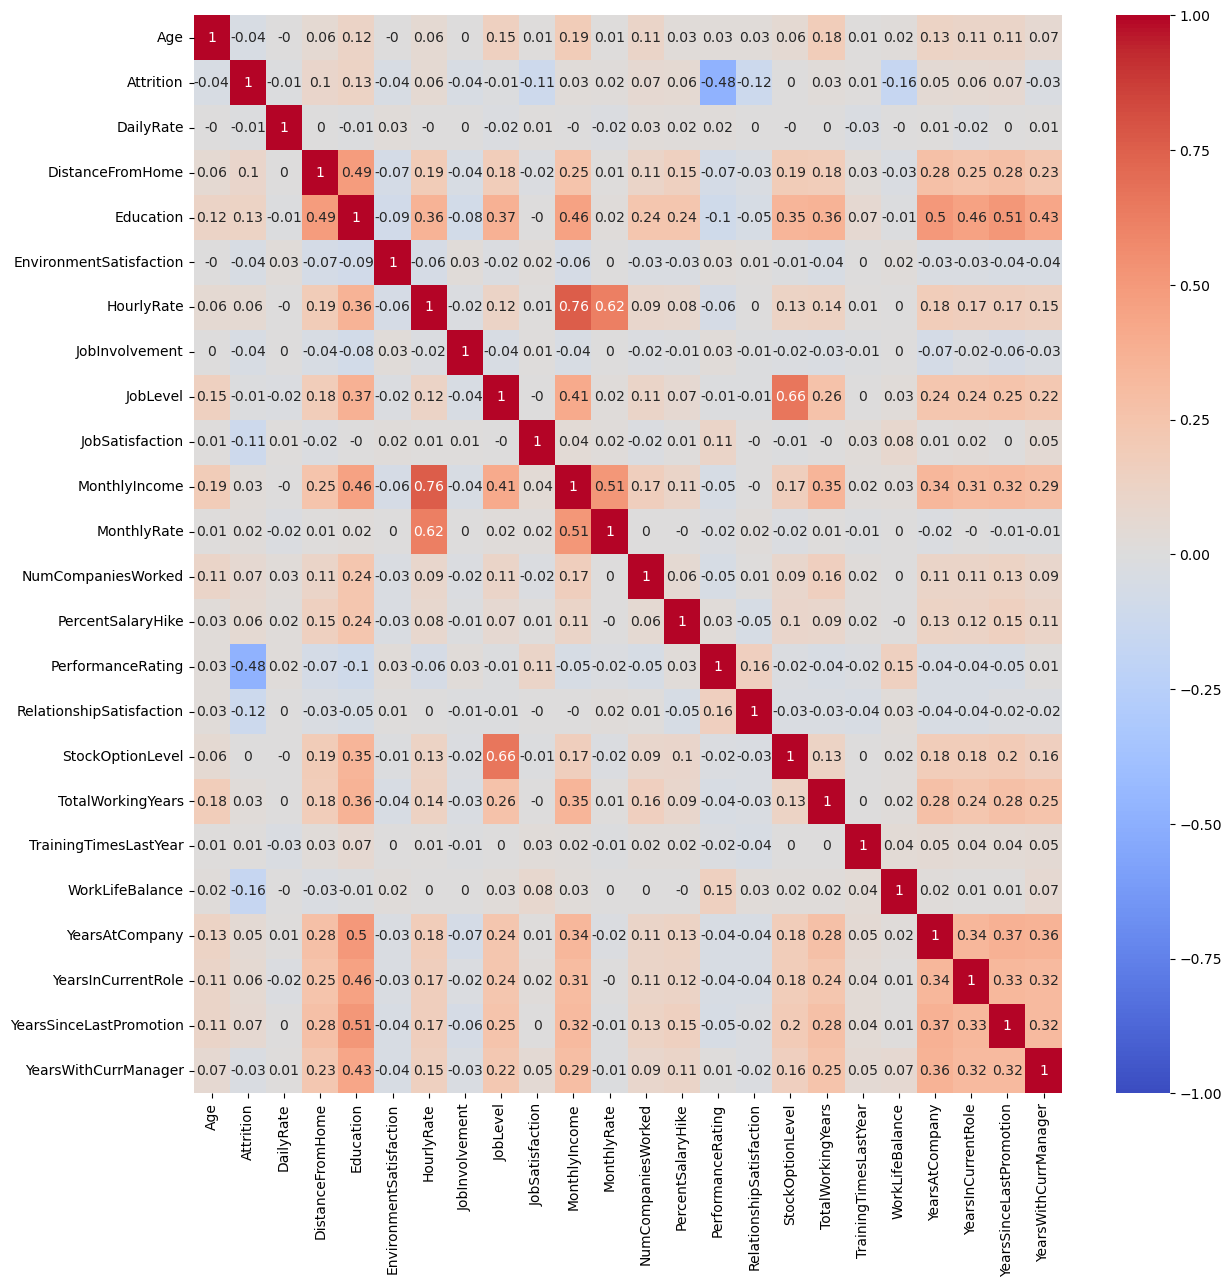

In [200]:
plt.figure(figsize=(14,14))
sns.heatmap(attrition_df.corr().round(2), 
            annot=True,
            vmax=1,
            vmin=-1,
            cmap='coolwarm'
           );

In [201]:
correlation_matrix = attrition_df.corr()

high_corr = correlation_matrix.unstack()
high_corr = high_corr[high_corr != 1]  
high_corr = high_corr.drop_duplicates()  
high_corr = high_corr[abs(high_corr) > 0.7]  
high_corr.sort_values(ascending=False)

HourlyRate  MonthlyIncome    0.759161
dtype: float64

In [202]:
# We will drop MonthlyIncome due to high correlation with HourlyRate
attrition_df.drop('MonthlyIncome', axis=1, inplace=True)

# Baseline Model

In [203]:
# All numeric features
features_baseline = attrition_df.select_dtypes(['number']).drop('Attrition', axis=1)

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score

In [205]:
X = features_baseline
y = attrition_df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

baseline_model = LogisticRegression(solver='liblinear')
baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)

pd.DataFrame(index=['Accuracy', 'Precission', 'Recall'],
             columns=['Train', 'Test'],
            data=[[accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred), ],
                 [precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred), ],
                 [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), ]]
            )

,Train,Test
Accuracy,0.751186,0.736565
Precission,0.719893,0.696154
Recall,0.561587,0.514205


In [206]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=4 )
cvscore = cross_val_score(baseline_model, X_train, y_train, cv=kf)
cvscore

array([0.74703557, 0.7602108 , 0.73649539, 0.75230567, 0.75065963])

In [207]:
pd.DataFrame({'Feature': features_baseline.columns, 
              'Coefficient': model.coef_[0], 
              'Odds Ratio': np.exp(model.coef_[0]) })

,Feature,Coefficient,Odds Ratio
0,Age,0.003140,1.003145
1,DailyRate,0.000184,1.000184
2,DistanceFromHome,0.009990,1.010040
3,Education,0.040546,1.041379
4,EnvironmentSatisfaction,0.018820,1.018998
5,HourlyRate,0.012917,1.013001
6,JobInvolvement,0.048853,1.050066
7,JobLevel,-0.093379,0.910848
8,JobSatisfaction,-0.000047,0.999954
9,MonthlyRate,0.000040,1.000040


In [208]:
target_names = ['No', 'Yes']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.75      0.87      0.81       597
         Yes       0.70      0.51      0.59       352

    accuracy                           0.74       949
   macro avg       0.72      0.69      0.70       949
weighted avg       0.73      0.74      0.73       949



In [209]:
confusion_matrix(y_test, y_test_pred)

array([[518,  79],
       [171, 181]])

The baseline logistic regression model displays moderate effectiveness in predicting employee attrition, achieving an accuracy of 73.66% on the test dataset. The precision and recall metrics for employees likely to leave are approximately 69.62% and 51.42%, respectively, indicating the model's reasonable ability to identify employees at risk of leaving when predicted. Yet, it fails to capture nearly half of the actual attrition cases. The performance is more reliable for predicting employees' likely stay, as evidenced by higher metrics in these scenarios. Many false negatives in the confusion matrix, where many employees who did leave were not correctly identified, further underscores this point.

Analyzing the coefficients and odds ratios from the model highlights key drivers of attrition. Positive coefficients for variables like 'DistanceFromHome' and 'PercentSalaryHike' suggest that increases in these factors are associated with higher attrition likelihood. Conversely, negative coefficients for 'JobSatisfaction' and 'RelationshipSatisfaction' indicate that higher satisfaction levels correlate with reduced attrition risks. Notably, a very low odds ratio for 'PerformanceRating' (0.392) indicates a strong negative impact, where lower performance ratings substantially increase the likelihood of leaving. These insights from the model suggest that strategies to improve job satisfaction, performance feedback, and enhance work-life balance could be particularly effective in mitigating employee turnover.

# Feature Engineering and Selection

In [210]:
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Group,Income_Quartile
0,38,1,Rarely,1180,Research & Development,29,1,Medical,2,Male,70,3,2,Healthcare Representative,1,Married,11354.0,7,Yes,19,1,2,0,17,2,1,1,0,0,0,36-65,Lower-Middle
1,49,0,Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,24907.0,1,No,23,4,4,1,10,3,3,10,7,1,7,36-65,Lower-Middle
2,28,1,No,1366,Research & Development,24,2,Technical Degree,2,Male,72,2,3,Healthcare Representative,1,Single,12355.0,1,No,12,1,1,0,10,2,1,10,7,1,0,18-35,Lower-Middle
3,33,0,Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,23159.0,1,Yes,11,3,3,0,8,3,3,8,7,3,0,18-35,Lowest
4,27,0,Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,16632.0,9,No,12,3,4,1,6,3,3,2,2,2,2,18-35,Lowest


In [223]:
attrition_df.drop(['Age_Group', 'Income_Quartile'], axis=1, inplace=True)

In [211]:
# Binarization of simple columns
attrition_df['Gender'] = (attrition_df['Gender'] == 'Male').astype(int)
attrition_df['OverTime'] = (attrition_df['OverTime'] == 'Yes').astype(int)

In [212]:
# Bins for Bussiness Travel
travel_hierarchy = {
    'No': 0,
    'Rarely': 1,
    'Frequently': 2
}

attrition_df['BusinessTravel'] = attrition_df['BusinessTravel'].map(travel_hierarchy)

In [213]:
# Bins for EducationField to fewer categories
education_field_mapping = {
    'Medical': 'Science and Technology',
    'Life Sciences': 'Science and Technology',
    'Technical Degree': 'Science and Technology',
    'Marketing': 'Business and Management',
    'Human Resources': 'Business and Management',
    'Sales': 'Business and Management',
    'Other': 'Other'
}


attrition_df['EducationField'] = attrition_df['EducationField'].map(education_field_mapping)

In [214]:
# Bins for JobRole to fewer categories
job_role_mapping = {
    'Healthcare Representative': 'Management',
    'Research Scientist': 'Research and Development',
    'Laboratory Technician': 'Research and Development',
    'Manufacturing Director': 'Management',
    'Manager': 'Management',
    'Research Director': 'Research and Development',
    'Sales Executive': 'Sales',
    'Sales Representative': 'Sales',
    'Human Resources': 'Human Resources'
}

attrition_df['JobRole'] = attrition_df['JobRole'].map(job_role_mapping)

In [215]:
# Bins for Total Working Years
bins = [0, 5, 15, 25, 50]  
labels = [1, 2, 3, 4]  

attrition_df['CareerStage'] = pd.cut(attrition_df['TotalWorkingYears'], bins=bins, labels=labels, right=False).astype(int)

In [216]:
# Hierarchial bining for years at company
def bin_years_at_company(years):
    if years <= 1:
        return 1
    elif years <= 5:
        return 2
    elif years <= 10:
        return 3
    else:
        return 4

attrition_df['YearsAtCompanyHierarchy'] = attrition_df['YearsAtCompany'].apply(bin_years_at_company)

In [217]:
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Group,Income_Quartile,CareerStage,YearsAtCompanyHierarchy
0,38,1,1,1180,Research & Development,29,1,Science and Technology,2,1,70,3,2,Management,1,Married,11354.0,7,1,19,1,2,0,17,2,1,1,0,0,0,36-65,Lower-Middle,3,1
1,49,0,2,279,Research & Development,8,1,Science and Technology,3,1,61,2,2,Research and Development,2,Married,24907.0,1,0,23,4,4,1,10,3,3,10,7,1,7,36-65,Lower-Middle,2,3
2,28,1,0,1366,Research & Development,24,2,Science and Technology,2,1,72,2,3,Management,1,Single,12355.0,1,0,12,1,1,0,10,2,1,10,7,1,0,18-35,Lower-Middle,2,3
3,33,0,2,1392,Research & Development,3,4,Science and Technology,4,0,56,3,1,Research and Development,3,Married,23159.0,1,1,11,3,3,0,8,3,3,8,7,3,0,18-35,Lowest,2,3
4,27,0,1,591,Research & Development,2,1,Science and Technology,1,1,40,3,1,Research and Development,2,Married,16632.0,9,0,12,3,4,1,6,3,3,2,2,2,2,18-35,Lowest,2,2


In [226]:
extended_df = pd.get_dummies(attrition_df, drop_first=True)

In [227]:
extended_df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CareerStage,YearsAtCompanyHierarchy,Department_Research & Development,Department_Sales,EducationField_Other,EducationField_Science and Technology,JobRole_Management,JobRole_Research and Development,JobRole_Sales,MaritalStatus_Married,MaritalStatus_Single
0,38,1,1,1180,29,1,2,1,70,3,2,1,11354.0,7,1,19,1,2,0,17,2,1,1,0,0,0,3,1,1,0,0,1,1,0,0,1,0
1,49,0,2,279,8,1,3,1,61,2,2,2,24907.0,1,0,23,4,4,1,10,3,3,10,7,1,7,2,3,1,0,0,1,0,1,0,1,0
2,28,1,0,1366,24,2,2,1,72,2,3,1,12355.0,1,0,12,1,1,0,10,2,1,10,7,1,0,2,3,1,0,0,1,1,0,0,0,1
3,33,0,2,1392,3,4,4,0,56,3,1,3,23159.0,1,1,11,3,3,0,8,3,3,8,7,3,0,2,3,1,0,0,1,0,1,0,1,0
4,27,0,1,591,2,1,1,1,40,3,1,2,16632.0,9,0,12,3,4,1,6,3,3,2,2,2,2,2,2,1,0,0,1,0,1,0,1,0


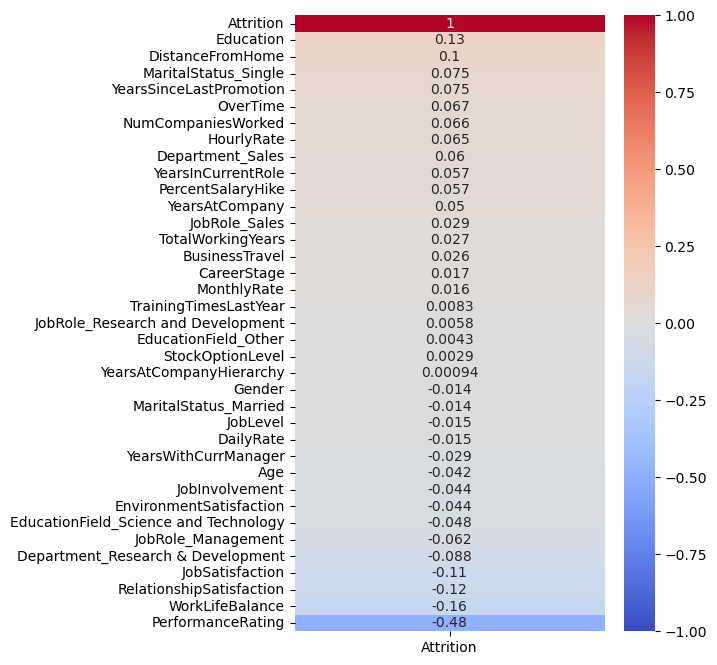

In [228]:
corrMatrix = extended_df.corr()
plt.figure(figsize=(5,8))
sns.heatmap(corrMatrix[['Attrition']].sort_values(by='Attrition', ascending=False), 
            annot=True, 
            cmap='coolwarm',
           vmin=-1,
           vmax=1);

In [229]:
correlation_matrix = extended_df.corr()

high_corr = correlation_matrix.unstack()
high_corr = high_corr[high_corr != 1]  
high_corr = high_corr.drop_duplicates()  
high_corr = high_corr[abs(high_corr) > 0.7]  
high_corr.sort_values(ascending=False)

TotalWorkingYears      CareerStage                0.951331
YearsAtCompany         YearsAtCompanyHierarchy    0.802051
MaritalStatus_Married  MaritalStatus_Single      -0.858683
dtype: float64

In [230]:
extended_df.drop(['CareerStage', 'YearsAtCompanyHierarchy'], axis=1, inplace=True)

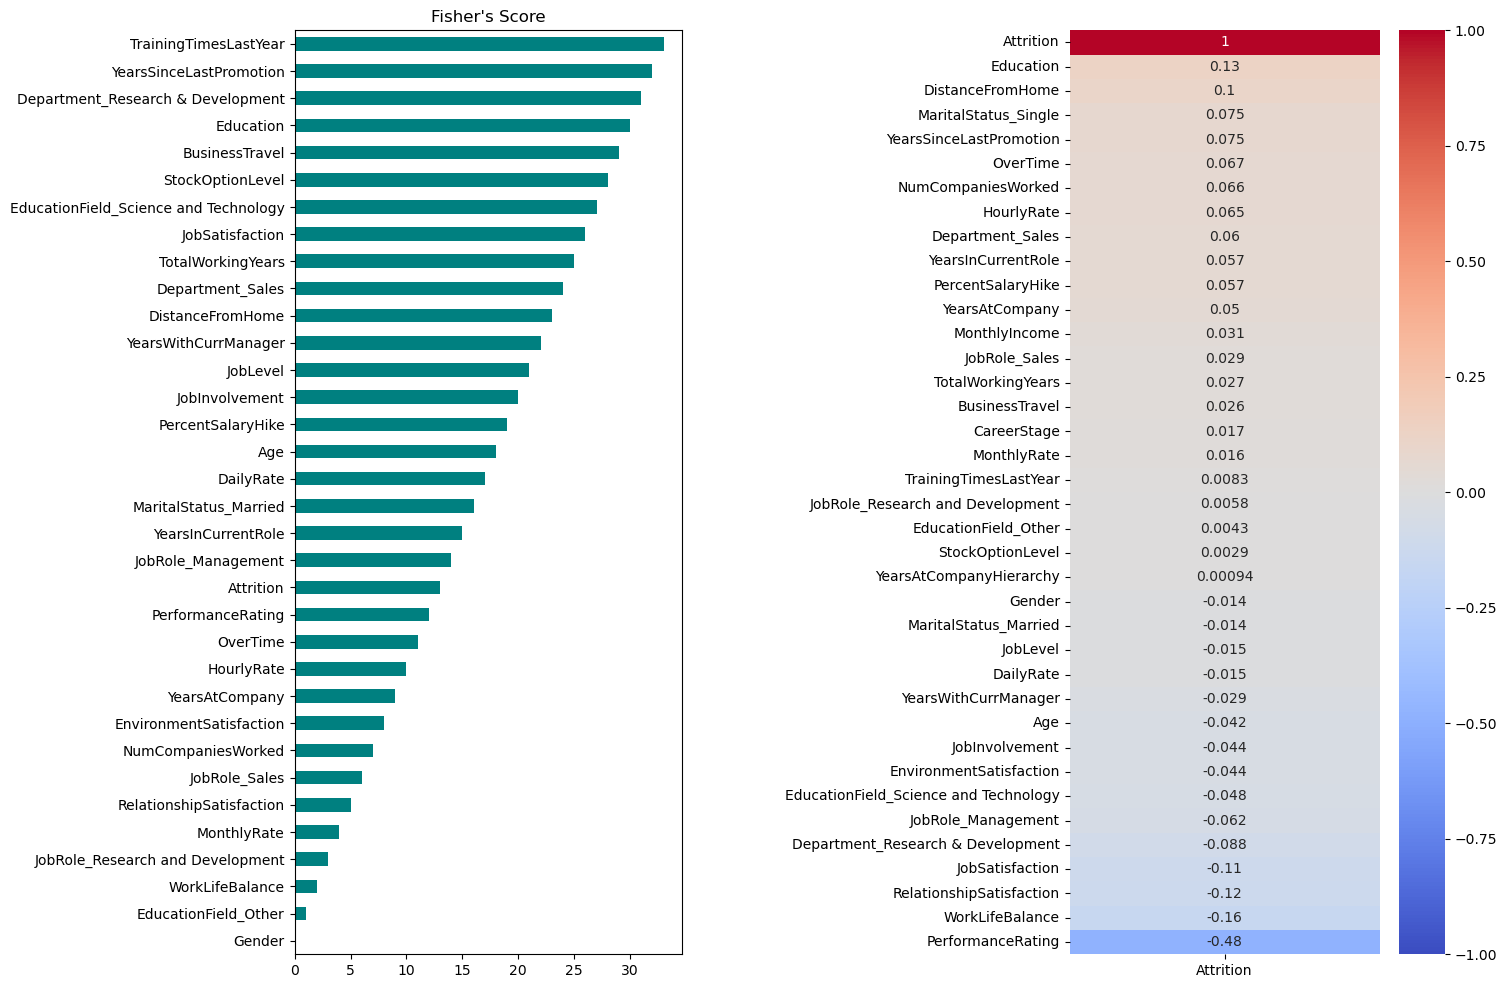

In [96]:
X = extended_df.drop('Attrition', axis=1)
y = extended_df['Attrition']

from skfeature.function.similarity_based import fisher_score

ranks = fisher_score.fisher_score(X.to_numpy(),y.to_numpy())
feature_importance = pd.Series(ranks, extended_df.columns[0:len(extended_df.columns) - 1]).sort_values()

from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X,y)
feat_importance = pd.Series(importance, extended_df.columns[0: len(extended_df.columns)-1]).sort_values()
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,12))

feature_importance.plot(kind = 'barh', color = 'teal', ax=ax[0], title="Fisher's Score")
sns.heatmap(corrMatrix[['Attrition']].sort_values(by='Attrition', ascending=False), 
            annot=True, 
            cmap='coolwarm',
           vmin=-1,
           vmax=1, ax=ax[1]);
fig.subplots_adjust(wspace=1)
plt.show()

In [97]:
feature_importance

Gender                                    0
EducationField_Other                      1
WorkLifeBalance                           2
JobRole_Research and Development          3
MonthlyRate                               4
RelationshipSatisfaction                  5
JobRole_Sales                             6
NumCompaniesWorked                        7
EnvironmentSatisfaction                   8
YearsAtCompany                            9
HourlyRate                               10
OverTime                                 11
PerformanceRating                        12
Attrition                                13
JobRole_Management                       14
YearsInCurrentRole                       15
MaritalStatus_Married                    16
DailyRate                                17
Age                                      18
PercentSalaryHike                        19
JobInvolvement                           20
JobLevel                                 21
YearsWithCurrManager            

In [98]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

variables = sm.OLS(y, X).exog

pd.Series(
    [vif(variables, i) for i in range(variables.shape[1])],
    index=X.columns
).sort_values(ascending=False)

PercentSalaryHike                        14.715896
HourlyRate                               14.520372
Education                                12.564623
Age                                      11.991679
MonthlyRate                              11.105588
JobLevel                                  9.942936
PerformanceRating                         8.876653
MaritalStatus_Married                     7.938384
MaritalStatus_Single                      7.935995
JobInvolvement                            7.352405
RelationshipSatisfaction                  7.200665
WorkLifeBalance                           6.956921
EnvironmentSatisfaction                   6.186808
JobSatisfaction                           6.014499
JobRole_Research and Development          5.986430
StockOptionLevel                          5.166247
JobRole_Sales                             4.749359
DailyRate                                 4.700118
JobRole_Management                        4.689771
TotalWorkingYears              

In [101]:
corrMatrix[['Attrition']].sort_values('Attrition', ascending=False)

,Attrition
Attrition,1.000000
Education,0.131740
DistanceFromHome,0.103898
MaritalStatus_Single,0.075486
YearsSinceLastPromotion,0.074555
OverTime,0.067200
NumCompaniesWorked,0.065801
HourlyRate,0.064674
Department_Sales,0.059992
YearsInCurrentRole,0.056648


In [107]:
lr_set = extended_df.drop(["PercentSalaryHike",  
    "HourlyRate",         
    "Education",          
    "Age",                
    "MonthlyRate",        
    "Gender",             
    "EducationField_Other",  
    "TrainingTimesLastYear"], axis=1)

In our analysis to simplify the predictive model while retaining crucial predictive power, we are considering the removal of certain columns based on Fisher's scores, VIF scores, and correlation coefficients. Specifically, we target columns that show low importance in Fisher's scoring, low correlation with attrition, and/or high VIF scores that suggest problematic multicollinearity, which can distort regression coefficients. Our analysis identified high VIF scores in features like PercentSalaryHike, HourlyRate, Education, Age, and MonthlyRate, indicating significant multicollinearity. Low Fisher's scores were noted for Gender, EducationField_Other, and again MonthlyRate, pointing to their limited capacity to distinguish between classes. 

Furthermore, features such as TrainingTimesLastYear, JobRole_Research and Development, EducationField_Other, StockOptionLevel, and YearsAtCompanyHierarchy showed weak correlations with attrition, suggesting minimal linear impact on the outcome variable. Based on these findings, we propose dropping these columns to simplify the model and improve its interpretability without compromising accuracy. This strategic reduction focuses on more impactful variables, enhancing the model's efficiency and effectiveness.

# Logist Regression Model

In [111]:
X = lr_set.drop(['Attrition'], axis=1)
y = lr_set['Attrition']

In [112]:
# Adressing imbalance issues
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=4)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=4)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

pd.DataFrame(index=['Accuracy', 'Precission', 'Recall'],
             columns=['Train', 'Test'],
            data=[[accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred), ],
                 [precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred), ],
                 [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), ]]
            )

,Train,Test
Accuracy,0.789674,0.799492
Precission,0.811121,0.842301
Recall,0.751704,0.749175


In [115]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=4)
cvscore = cross_val_score(lr_model, X_train_scaled, y_train, cv=kf)
print('Cross Validation Score: ', cvscore.mean())

Cross Validation Score:  0.7843862769444165


In [116]:
cvscore

array([0.77484144, 0.79365079, 0.7989418 , 0.77777778, 0.77671958])

In [118]:
pd.DataFrame({'Feature': X.columns, 
              'Coefficient': lr_model.coef_[0], 
              'Odds Ratio': np.exp(lr_model.coef_[0]) })

,Feature,Coefficient,Odds Ratio
0,BusinessTravel,-0.041367,0.959477
1,DailyRate,0.011679,1.011748
2,DistanceFromHome,0.168311,1.183304
3,EnvironmentSatisfaction,-0.088430,0.915367
4,JobInvolvement,-0.130652,0.877524
5,JobLevel,-0.068671,0.933634
6,JobSatisfaction,-0.184287,0.831697
7,NumCompaniesWorked,0.059575,1.061386
8,OverTime,0.257998,1.294336
9,PerformanceRating,-1.203797,0.300053


In [119]:
target_names = ['No', 'Yes']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.76      0.85      0.81       576
         Yes       0.84      0.75      0.79       606

    accuracy                           0.80      1182
   macro avg       0.80      0.80      0.80      1182
weighted avg       0.80      0.80      0.80      1182



In [120]:
confusion_matrix(y_test, y_test_pred)

array([[491,  85],
       [152, 454]])

The logistic regression model shows promising results in predicting employee attrition within the organization, aligning well with the primary business goal to identify and understand key factors contributing to employee turnover. The model reliably identifies employees who are likely to leave with test accuracy at approximately 80% and precision at around 84%. The recall rate of roughly 75% on the test set indicates that while the model is quite adept at identifying true positives (actual cases of attrition), it still misses about 25%. The model's consistent performance is supported by a cross-validation score of about 78%, which confirms its stability and reliability across different subsets of data.

From the coefficients and odds ratios derived from the model, significant predictors of attrition include 'PerformanceRating,' 'OverTime,' and various job roles, with 'PerformanceRating' showing a notably strong negative influence (odds ratio of 0.300), suggesting that lower performance ratings drastically increase the likelihood of attrition. Factors such as 'OverTime' (odds ratio of 1.294) significantly raise attrition risk, potentially indicating issues with work-life balance. Conversely, higher job satisfaction and better work-life balance are linked with lower attrition rates, as seen from their negative coefficients. This analysis highlights critical areas where strategic interventions could mitigate turnover, such as improving work conditions, managing overtime effectively, and fostering job satisfaction and employee engagement, particularly in roles and departments identified as high-risk.

# Random Forest Model

In [154]:
# Overfit
X = lr_set.drop('Attrition', axis=1)
y = lr_set['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=4)

rf.fit(X_train, y_train)

print(f"Training Accuracy: {rf.score(X_train, y_train)}")
print(f"Test Accuracy: {rf.score(X_test, y_test)}")

Training Accuracy: 1.0
Test Accuracy: 0.7723919915700738


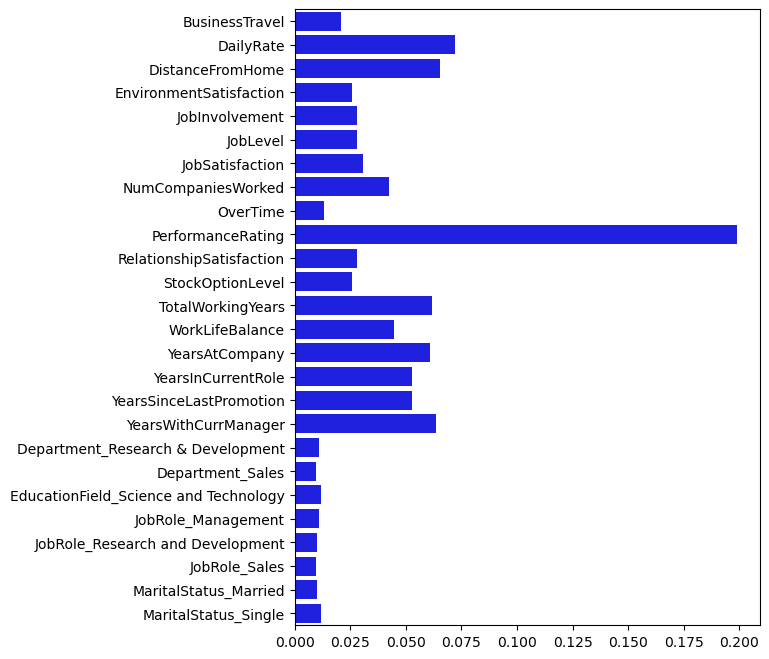

In [156]:
# Feature Importances Plot
plt.figure(figsize=(6,8))
sns.barplot(x=rf.feature_importances_, y=X.columns, color="blue");

In [157]:
pd.DataFrame({'Features': X.columns,
             'Score': rf.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

,Features,Score
0,PerformanceRating,0.199109
1,DailyRate,0.072174
2,DistanceFromHome,0.065294
3,YearsWithCurrManager,0.063458
4,TotalWorkingYears,0.061638
5,YearsAtCompany,0.060870
6,YearsSinceLastPromotion,0.052794
7,YearsInCurrentRole,0.052727
8,WorkLifeBalance,0.044486
9,NumCompaniesWorked,0.042392


In [159]:
# Features to keep after Feature Importances Test
X = lr_set[[
    "PerformanceRating",
    "DailyRate",
    "DistanceFromHome",
    "YearsWithCurrManager",
    "TotalWorkingYears",
    "YearsAtCompany",
    "YearsSinceLastPromotion",
    "YearsInCurrentRole",
    "WorkLifeBalance",
    "NumCompaniesWorked",
    "JobSatisfaction",
    "JobInvolvement",
    "JobLevel",
    "RelationshipSatisfaction",
    "EnvironmentSatisfaction",
    "StockOptionLevel",
    "BusinessTravel"
]]
y = lr_set['Attrition']

X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=4)

In [173]:
#Optimize hyperparameters
from sklearn.model_selection import RandomizedSearchCV
      
rfcv = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=100, stop=1100, step=100),
    'max_features': [None, "sqrt"],
    'bootstrap': [True, False],
    'max_samples': [None, .3, .5, .9],
    'max_depth': np.arange(start=1, stop=11, step=1),
    'min_samples_leaf': [2, 5, 10, 20, 100],
}

grid = RandomizedSearchCV(
    rfcv, 
    params,
    n_iter=100,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 379, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/opt/

{'n_estimators': 700,
 'min_samples_leaf': 10,
 'max_samples': 0.9,
 'max_features': None,
 'max_depth': 10,
 'bootstrap': True}

In [174]:
# Fit with the optimized hyperparameters
rf2 = RandomForestClassifier(random_state=4, **grid.best_params_)
rf2.fit(X_train, y_train)

y_train_pred = rf2.predict(X_train)
y_test_pred = rf2.predict(X_test)

pd.DataFrame(index=['Accuracy', 'Precission', 'Recall'],
             columns=['Train', 'Test'],
            data=[[accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred), ],
                 [precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred), ],
                 [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), ]]
            )

,Train,Test
Accuracy,0.836437,0.804569
Precission,0.842838,0.833037
Recall,0.824532,0.773927


In [175]:
target_names = ['No', 'Yes']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.78      0.84      0.81       576
         Yes       0.83      0.77      0.80       606

    accuracy                           0.80      1182
   macro avg       0.81      0.81      0.80      1182
weighted avg       0.81      0.80      0.80      1182



In [177]:
confusion_matrix(y_test, y_test_pred)

array([[482,  94],
       [137, 469]])

In our analysis using the Random Forest model, we observed a training accuracy of 83.64% and a test accuracy of 80.46%, indicating a robust predictive capability with slight overfitting, which is typical in complex models. The precision of the model in the test set was notably high at 83.30%, while the recall was somewhat lower at 77.39%. This disparity suggests that while the model is quite reliable in identifying true positives (actual attrition cases), it slightly struggles to capture all potential attrition instances, missing about 23%.

We utilized a subset of features identified as most impactful from a feature importance analysis, including 'PerformanceRating,' 'DailyRate,' 'DistanceFromHome,' 'YearsWithCurrManager,' and several others related to job satisfaction and employee status. This focused approach helped streamline the model to consider only the most influential factors, enhancing interpretability and performance. The confusion matrix from the test results, showing 469 true positives and 482 true negatives out of 1182 cases, further validates the effectiveness of our model in distinguishing between employees who will stay versus those who might leave, aligning well with our strategic objectives to enhance retention through targeted interventions.